<h1>Home work 1</h1> 

<br>
<h2>Classification algorithms comparison</h2>

In [1]:
import numpy as np
import torch
import pandas as pd 
from torch.autograd import Variable
from torch.nn import functional as F

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv
Saving housing.csv to housing.csv
Saving winequality-red.csv to winequality-red.csv


In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


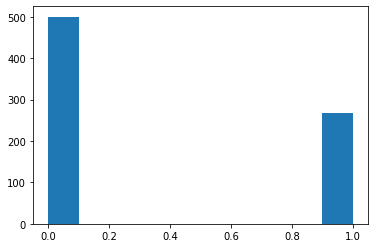

In [4]:
import matplotlib.pyplot as plt

#classes = 

plt.hist(df['Outcome'])
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = np.array(df.drop(columns = ['Outcome']))
y = np.array(df['Outcome'])
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [7]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LogisticRegression, self).__init__()
        self.linear = (torch.nn.Linear(inputSize, outputSize))
        

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out
criterion = torch.nn.CrossEntropyLoss()
inputDim = x_train.shape[1]
outputDim = 2      
learningRate = 0.01
epochs = 500000


In [8]:
model = LogisticRegression(inputDim,outputDim)
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [9]:
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train)

In [10]:
Error = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    Error.append(loss)
    if (epoch%5000 == 0):
        print(epoch, ' ',loss)

0   tensor(0.6501, grad_fn=<NllLossBackward>)
5000   tensor(0.6121, grad_fn=<NllLossBackward>)
10000   tensor(0.6110, grad_fn=<NllLossBackward>)
15000   tensor(0.6103, grad_fn=<NllLossBackward>)
20000   tensor(0.6099, grad_fn=<NllLossBackward>)
25000   tensor(0.6096, grad_fn=<NllLossBackward>)
30000   tensor(0.6094, grad_fn=<NllLossBackward>)
35000   tensor(0.6092, grad_fn=<NllLossBackward>)
40000   tensor(0.6091, grad_fn=<NllLossBackward>)
45000   tensor(0.6089, grad_fn=<NllLossBackward>)
50000   tensor(0.6088, grad_fn=<NllLossBackward>)
55000   tensor(0.6088, grad_fn=<NllLossBackward>)
60000   tensor(0.6087, grad_fn=<NllLossBackward>)
65000   tensor(0.6086, grad_fn=<NllLossBackward>)
70000   tensor(0.6085, grad_fn=<NllLossBackward>)
75000   tensor(0.6085, grad_fn=<NllLossBackward>)
80000   tensor(0.6084, grad_fn=<NllLossBackward>)
85000   tensor(0.6084, grad_fn=<NllLossBackward>)
90000   tensor(0.6083, grad_fn=<NllLossBackward>)
95000   tensor(0.6083, grad_fn=<NllLossBackward>)
10000

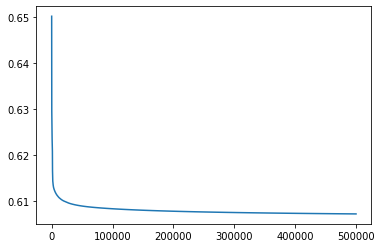

In [11]:
%matplotlib inline
plt.plot(Error)

In [12]:
x_test = torch.from_numpy(x_test).float()
y_pred = model.forward(x_test)

In [13]:
y_pred = np.argmax(y_pred.detach().numpy(),axis = 1)

In [14]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       108
           1       0.00      0.00      0.00        46

    accuracy                           0.70       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.49      0.70      0.58       154



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
confusion_matrix(y_test, y_pred)

array([[108,   0],
       [ 46,   0]])

In [19]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
y_pred = clf.predict(x_test)

In [22]:
confusion_matrix(y_test, y_pred)

array([[86, 22],
       [20, 26]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       108
           1       0.54      0.57      0.55        46

    accuracy                           0.73       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.73      0.73      0.73       154



<h2>Task1</h2>
<br>
<li> Make a comparison for logistic regression and other 3 different classification/clasterisation algorithms for multiclass classification task and find one with overall accuracy more than 90% You can use all available sources 
<li> Make a comparative analisys for the observed algorithms and highlight why from your potint of view it shows the best result 
<li> Use the provided dataset for training and testing 
<li> Use classification report and confusion matrix for evaluation results 
    <h2>Task 2 </h2>
<br>
    <li> adopte logistic regressionfor for multiclassifiction on wine quality dataset 

In [ ]:
#KNN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model


classifier = Sequential()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)
# Predicting
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[114  16]
 [ 22  40]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       130
           1       0.71      0.65      0.68        62

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.80      0.80      0.80       192



In [ ]:
#SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[117  13]
 [ 25  37]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.74      0.60      0.66        62

    accuracy                           0.80       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.80      0.80      0.80       192



In [ ]:
#Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[114  16]
 [ 29  33]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.67      0.53      0.59        62

    accuracy                           0.77       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



In [ ]:
#The best result was shown by KNN with accuracy 0.80

In [ ]:
#Task 2

In [24]:
df = pd.read_csv('winequality-red.csv', sep = ';')

In [25]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
from sklearn.model_selection import train_test_split

In [26]:
X = np.array(df.drop(columns = ['quality']))
y = np.array(df['quality'])
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [27]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LogisticRegression, self).__init__()
        self.linear = (torch.nn.Linear(inputSize, outputSize))
        

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out
criterion = torch.nn.CrossEntropyLoss()
inputDim = x_train.shape[1]
outputDim = 2      
learningRate = 0.01
epochs = 200000

In [28]:
model = LogisticRegression(inputDim,outputDim)
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [29]:
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train)

In [30]:
Error = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    Error.append(loss)
    if (epoch%5000 == 0):
        print(epoch, ' ',loss)

IndexError: ignored

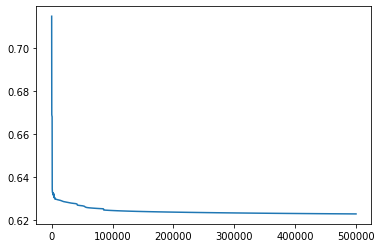

In [ ]:
%matplotlib inline
plt.plot(Error)

In [ ]:
x_test = torch.from_numpy(x_test).float()
y_pred = model.forward(x_test)

TypeError: ignored

In [ ]:
y_pred = np.argmax(y_pred.detach().numpy(),axis = 1)

AttributeError: ignored

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred))

ValueError: ignored

In [ ]:
confusion_matrix(y_test, y_pred)

array([[103,   5],
       [ 41,   5]])